**Bernstein-Vazirani algorithm**

---

### 📌 The Problem

You are given a **black-box function** (or oracle) $f: \{0,1\}^n \rightarrow \{0,1\}$, defined as:

$$
f(x) = a \cdot x \mod 2
$$

Here:

* $x$ is an $n$-bit input.
* $a$ is a secret $n$-bit string (like `101011...`) that you want to find.
* The dot product $a \cdot x$ is the **bitwise inner product mod 2**:

$$
a \cdot x = a_0 x_0 \oplus a_1 x_1 \oplus \ldots \oplus a_{n-1} x_{n-1}
$$

---

### ⚛️ Quantum Approach (Bernstein-Vazirani Algorithm)

Quantumly, you can find **all bits of $a$** in **a single query** to the oracle.

---

### 🔧 How It Works – Step by Step

1. **Initialize the qubits**:

   * Start with $n$ qubits in $|0\rangle$ and one ancilla qubit in $|1\rangle$:

     $$
     |0\rangle^{\otimes n} |1\rangle
     $$

2. **Apply Hadamard gates**:

   * Apply Hadamard (H) to all $n+1$ qubits:

     $$
     \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \cdot \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
     $$

3. **Apply the oracle $U_f$**:

   * It maps $|x\rangle |y\rangle \to |x\rangle |y \oplus f(x)\rangle$
   * Since ancilla is in $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$, applying $f(x)$ flips the phase:

     $$
     |x\rangle \frac{|0\rangle - |1\rangle}{\sqrt{2}} \rightarrow (-1)^{f(x)} |x\rangle \frac{|0\rangle - |1\rangle}{\sqrt{2}}
     $$

4. **Apply Hadamard gates again to the first $n$ qubits**.

5. **Measure the first $n$ qubits**:

   * You get $|a\rangle$ — the secret bitstring — **with certainty**.

---

### 🧠 Why It Works

* The Hadamard transforms spread out and then collapse the amplitude in such a way that the interference pattern makes all amplitudes cancel **except the one corresponding to $a$**.
* It's a simple yet powerful demo of quantum **constructive and destructive interference**.

---

### 📈 Quantum Speedup

| Classical Queries | Quantum Queries |
| ----------------- | --------------- |
| $n$               | **1**           |

---

Would you like to see a small example, like for $n = 3$?


In [21]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator


In [22]:
shh = '1010'

inp_qubits = len(shh)
y_qubit = 1
total_qubits = inp_qubits + y_qubit

qc = QuantumCircuit(total_qubits, inp_qubits)

In [23]:
qc.x(total_qubits-1)

qc.h(range(total_qubits))
qc.barrier()
qc.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_4: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 4/═════════════

> we need quick bit order adjustment before we apply our oracle function. Since qubits are ordered from left to right we need to reverse the order of the bits in our string.

In [24]:
shh = shh[::-1]
shh

'0101'

In [25]:
# add cnot when we get a 1
for i, bit in enumerate(shh):
    if bit == '1':
        qc.cx(i, total_qubits-1)
qc.barrier()
qc.draw()

┌───┐      ░            ░ 
q_0: ┤ H ├──────░────────────░─
     ├───┤      ░            ░ 
q_1: ┤ H ├──────░───■────────░─
     ├───┤      ░   │        ░ 
q_2: ┤ H ├──────░───┼────────░─
     ├───┤      ░   │        ░ 
q_3: ┤ H ├──────░───┼────■───░─
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░─
     └───┘└───┘ ░ └───┘└───┘ ░ 
c: 4/══════════════════════════

In [26]:
qc.h(range(inp_qubits))
qc.barrier()
qc.measure(range(inp_qubits), range(inp_qubits))
qc.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░────────────░─┤ H ├─░─┤M├─────────
     ├───┤      ░            ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───■────────░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═══════════════════════════════════╩══╩══╩══╩═
                                        0  1  2  3

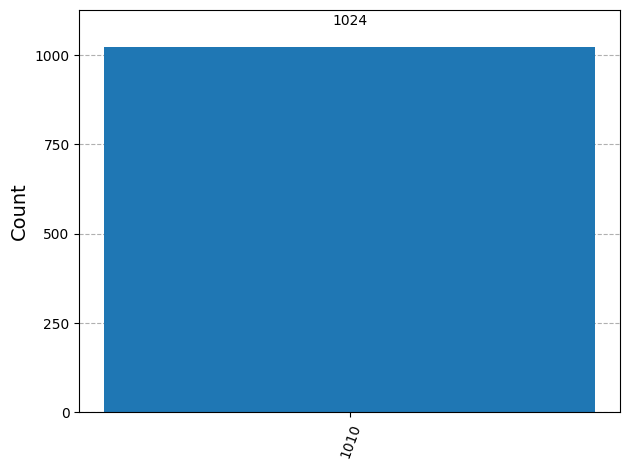

In [27]:
res = AerSimulator().run(qc, shots=1024).result()
counts = res.get_counts()
plot_histogram(counts)

In [28]:
from ibmq import IBMQClient

ibm_client = IBMQClient()

Least busy backend: ibm_brisbane
Job ID is d0gc2998jzxg008meqr0


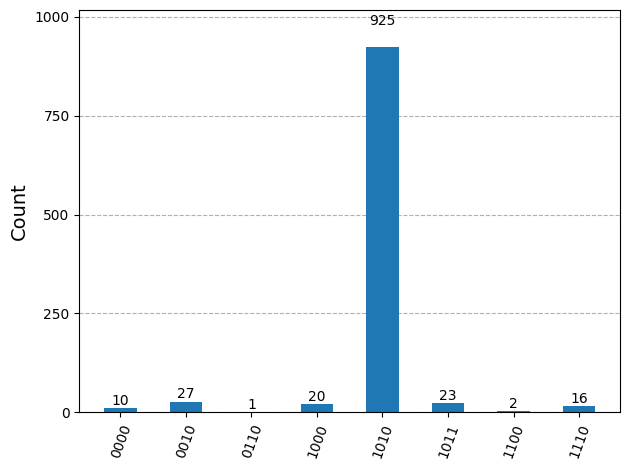

In [29]:
res = ibm_client.execute(qc, 1024)
plot_histogram(res[0].data['c'].get_counts())